In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [43]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,23,618391.0,68899.0,282.933034,5677,-1,5
1,20,451803.0,27928.0,206.713865,138,-1,3
2,24,1123801.0,68152.0,514.173762,1176,-1,5
3,24,971563.0,8725.0,2176.000000,6506,-1,6
4,23,1733850.0,160813.0,793.290073,10030,-1,4


In [44]:
scaler = StandardScaler()

columns_to_standardize = ['view_count','likes','dislikes','comment_count','channel_age','days_uploaded']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,23,-0.244346,-0.142149,-0.217398,-0.062424,-1.826462,0.378304
1,20,-0.264323,-0.234575,-0.234555,-0.135938,-1.826462,-0.436714
2,24,-0.183740,-0.143834,-0.165345,-0.122162,-1.826462,0.378304
3,24,-0.201996,-0.277894,0.208735,-0.051421,-1.826462,0.785813
4,23,-0.110586,0.065199,-0.102515,-0.004650,-1.826462,-0.029205


In [45]:
features = ['categoryId', 'view_count', 'dislikes', 'comment_count', 'days_uploaded']
target = 'likes'

In [46]:
X = df[features]
X

,categoryId,view_count,dislikes,comment_count,days_uploaded
0,23,-0.244346,-0.217398,-0.062424,0.378304
1,20,-0.264323,-0.234555,-0.135938,-0.436714
2,24,-0.183740,-0.165345,-0.122162,0.378304
3,24,-0.201996,0.208735,-0.051421,0.785813
4,23,-0.110586,-0.102515,-0.004650,-0.029205
...,...,...,...,...,...
245838,24,-0.229847,-0.204945,-0.113614,-0.844223
245839,24,-0.224868,-0.200669,-0.112712,-0.436714
245840,24,-0.223284,-0.199308,-0.111836,-0.029205
245841,24,-0.222864,-0.198948,-0.111597,0.378304


In [47]:
y = df[target]
y

0        -0.142149
1        -0.234575
2        -0.143834
3        -0.277894
4         0.065199
            ...   
245838   -0.235125
245839   -0.233300
245840   -0.232278
245841   -0.231425
245842   -0.230938
Name: likes, Length: 245843, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196674, 5), (49169, 5), (196674,), (49169,))

In [49]:
model = XGBRegressor(n_estimators = 1000, max_depth = 6, learning_rate = 0.01, colsample_bytree = 0.5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([-0.16707473, -0.25624812, -0.17961651, ...,  1.5473357 ,
        -0.21115558, -0.26518023], dtype=float32),
 array([-0.2789361 ,  0.21862417, -0.23401693, ..., -0.21105145,
        -0.21146965, -0.20894298], dtype=float32))

In [51]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.32370372527929464
Test RMSE = 0.42943475705986617


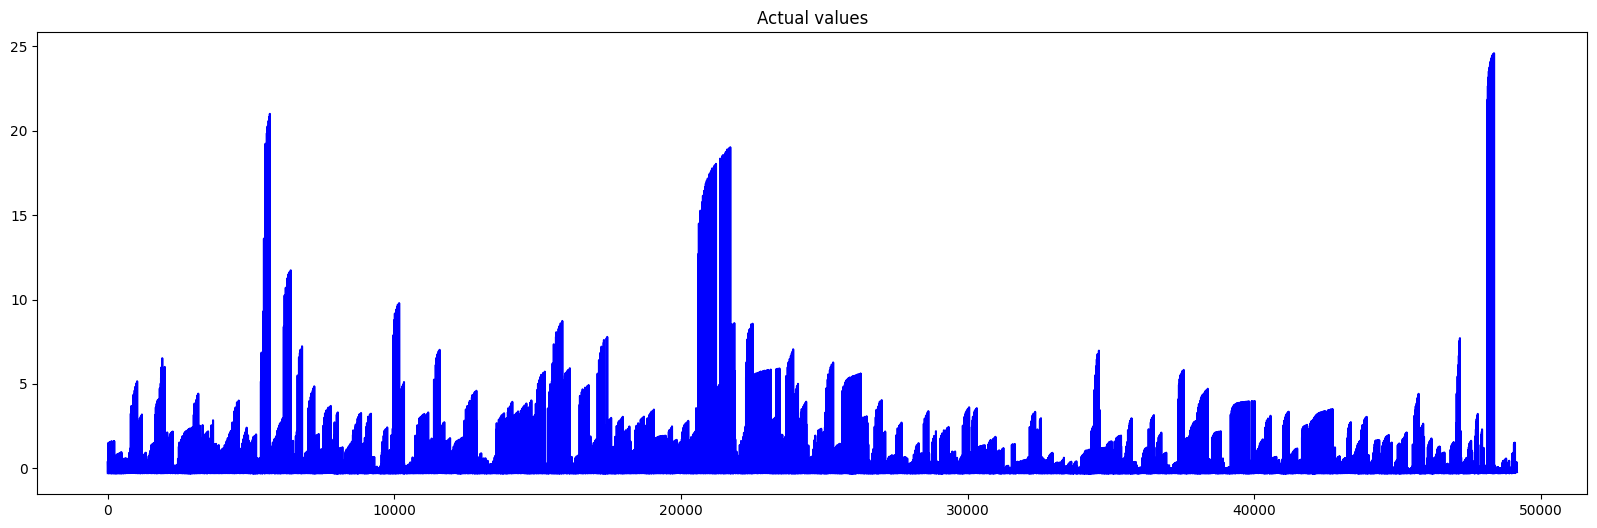

In [55]:
plt.figure(figsize=(20,6))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.title('Actual values')
plt.show()

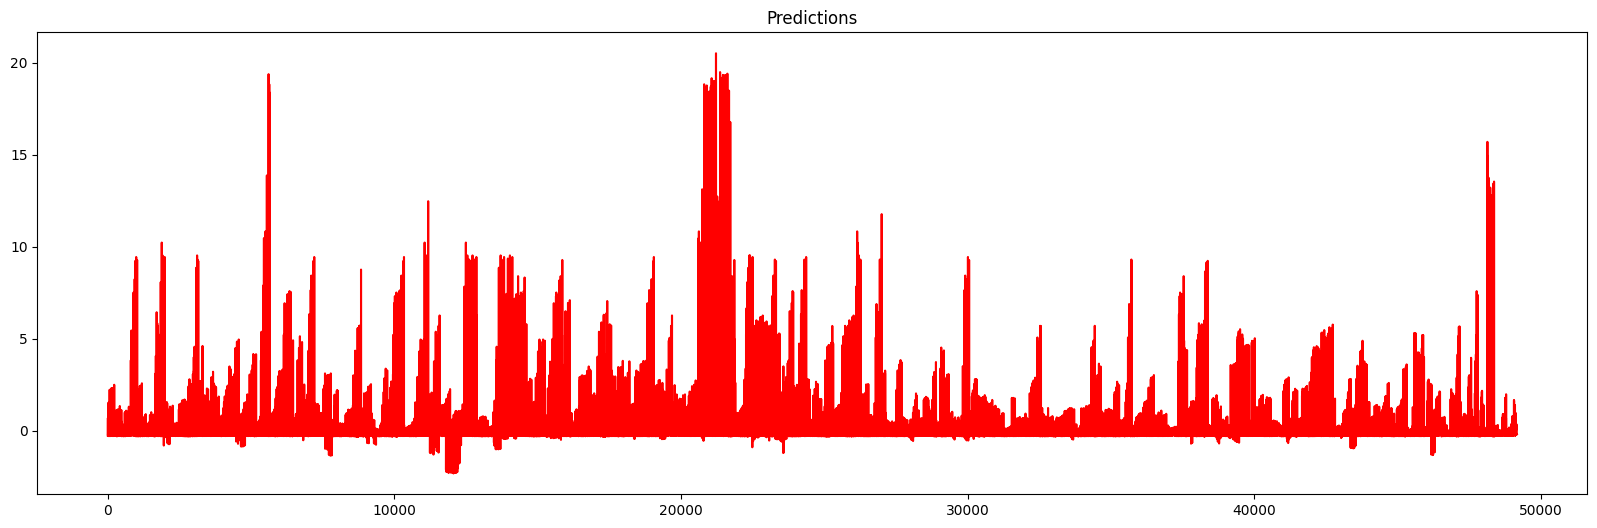

In [56]:
plt.figure(figsize=(20,6))
plt.plot(range(len(pred_test)), pred_test, color='red')
plt.title('Predictions')
plt.show()

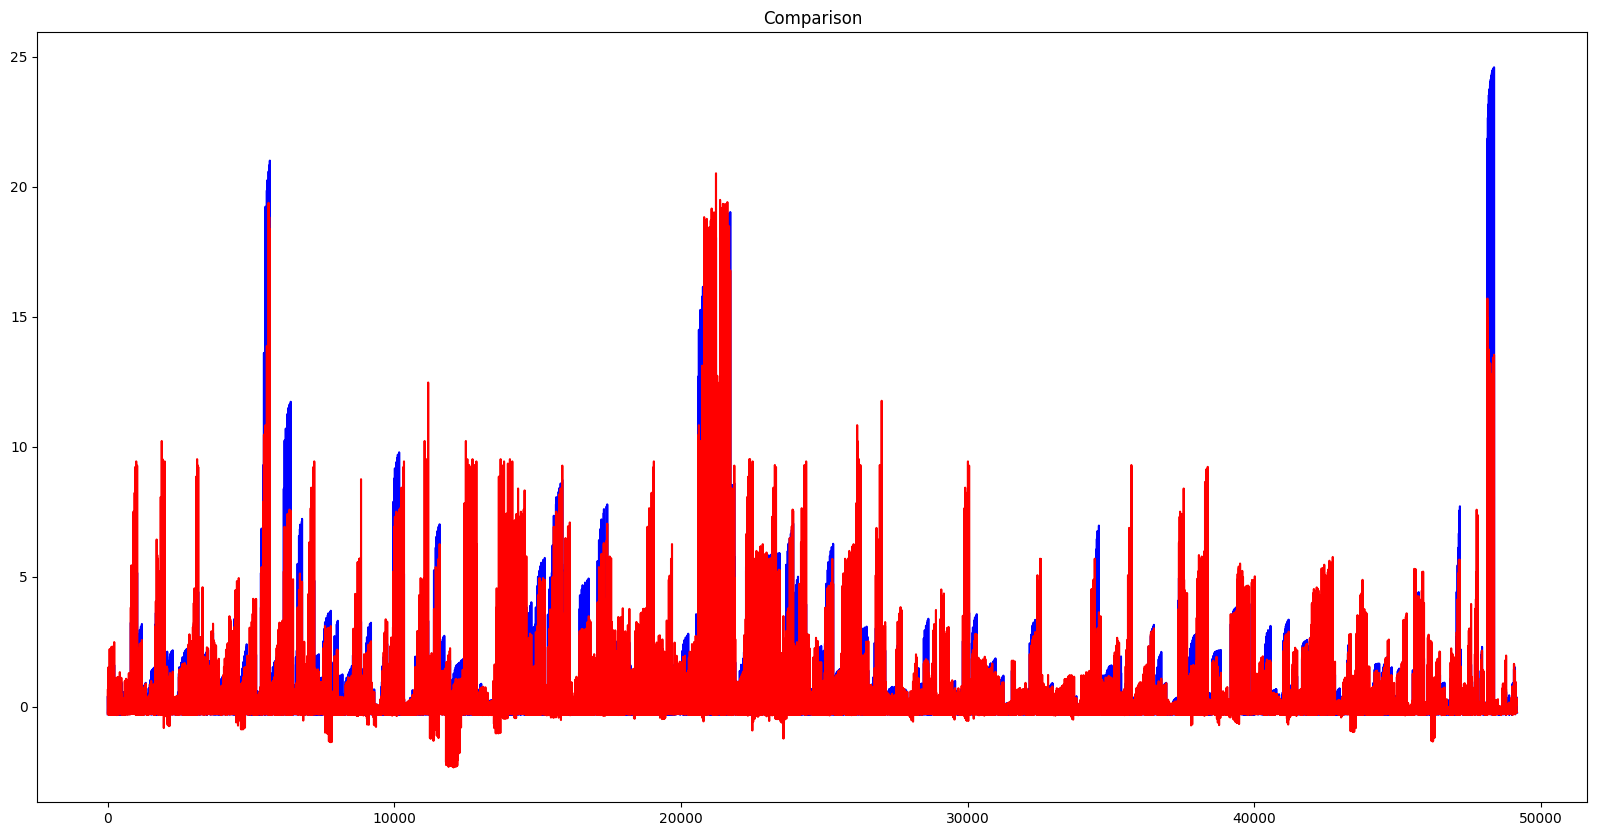

In [57]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(pred_test)), pred_test, color='red')
plt.title('Comparison')
plt.show()